# Introduction to Regression with Neural Networks in TensorFlow

There are many definition for regression problem but in our case, we're going to simplify it : predicting a numerical variable base on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import tensorflow as tf

# List available physical GPUs
gpus = tf.config.list_physical_devices('GPU')

print("Num GPUs Available: ", len(gpus))
print("Available GPUs: ", gpus)


Num GPUs Available:  1
Available GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf
import numpy as np

# Enable device placement logging
# tf.debugging.set_log_device_placement(True)

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Define a simple neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create dummy data
x_train = np.random.random((1000, 32))
y_train = np.random.randint(10, size=(1000,))

# Train the model and see the device placement logs
model.fit(x_train, y_train, epochs=100)


Num GPUs Available:  1
Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 2.3310 - accuracy: 0.0890
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2986 - accuracy: 0.1250
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2852 - accuracy: 0.1270
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2766 - accuracy: 0.1300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2683 - accuracy: 0.1410
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2529 - accuracy: 0.1620
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2460 - accuracy: 0.1700
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2355 - accuracy: 0.2030
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2296 - accuracy: 0.1680
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2204 - acc

In [5]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


### Create data view and fit

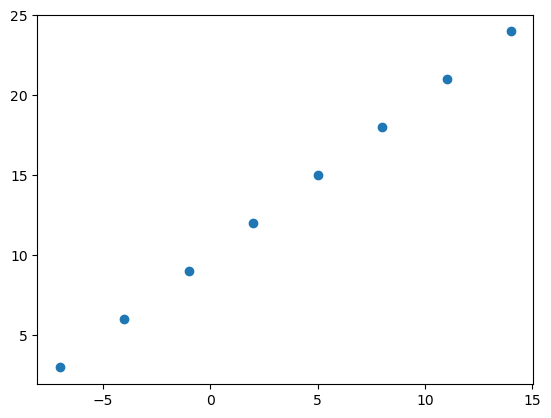

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)


In [7]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [8]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [9]:
X[0] , y[0]

(-7.0, 3.0)

In [10]:
X[1],y[1]

(-4.0, 6.0)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape  ,output_shape

((), ())

In [12]:
X[0].ndim

0

In [13]:
X[0],y[0]

(-7.0, 3.0)

In [14]:
# Turn out np arrays into tensors
X = tf.cast(tf.constant(X) , dtype=tf.float32)
y = tf.cast(tf.constant(y) , dtype=tf.float32)
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

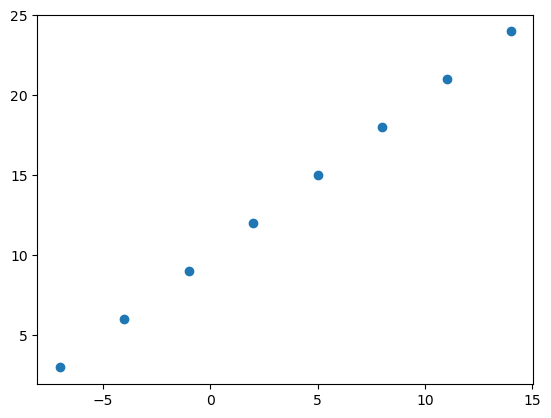

In [16]:
plt.scatter(X,y)

### Step in modelling with TensorFlow

1. **Create a model** - defind the input and output layers, as well as the hedden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells out model how wrong it is) and the optimizer (tell our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find pattern between X & y  (features and labels).

In [17]:
# # Optionally , the first layers can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
# ...

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [18]:
X.ndim , tf.expand_dims(X,axis=-1).ndim # Fix

(1, 2)

In [19]:
X.shape , tf.expand_dims(X,axis=-1).shape

(TensorShape([8]), TensorShape([8, 1]))

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 309ms/step - loss: 9.0876 - mae: 9.0876
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9551 - mae: 8.9551
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 8.8226 - mae: 8.8226
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6901 - mae: 8.6901
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5576 - mae: 8.5576
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.4251 - mae: 8.4251
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2926 - mae: 8.2926
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1601 - mae: 8.1601
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0276 - mae: 8.0276
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8951 - mae: 7.8951
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.762

In [21]:
# Checkout X and y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Try and make a predition using our model
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 87ms/step


array([[24.802053]], dtype=float32)

In [23]:
y_pred  + 14.037

array([[38.839054]], dtype=float32)

### Improving our model

we can improve our model, by altering the steps we took to create a model.

1. **Create a model** - era we might add more layers, within each of the hiden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs**  (leave it training for longer) or on more data (give the model more dataset to learn from).

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient decent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 251ms/step - loss: 10.8657 - mae: 10.8657
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7332 - mae: 10.7332
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6007 - mae: 10.6007
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4682 - mae: 10.4682
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3357 - mae: 10.3357
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2032 - mae: 10.2032
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0707 - mae: 10.0707
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9382 - mae: 9.9382
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8057 - mae: 9.8057
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6732 - mae: 9.6732
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [25]:
# Remind ourselve of the data
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# Let's see if our model's prediction has improve..
model.predict([14])

1/1 [==============================] - 0s 55ms/step


array([[24.584566]], dtype=float32)

In [27]:
# Rewrite

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1) , y , epochs=170)

Epoch 1/170
1/1 [==============================] - 0s 411ms/step - loss: 14.4108 - mae: 14.4108
Epoch 2/170
1/1 [==============================] - 0s 5ms/step - loss: 11.2591 - mae: 11.2591
Epoch 3/170
1/1 [==============================] - 0s 5ms/step - loss: 8.9999 - mae: 8.9999
Epoch 4/170
1/1 [==============================] - 0s 8ms/step - loss: 5.7972 - mae: 5.7972
Epoch 5/170
1/1 [==============================] - 0s 5ms/step - loss: 5.0386 - mae: 5.0386
Epoch 6/170
1/1 [==============================] - 0s 5ms/step - loss: 5.8791 - mae: 5.8791
Epoch 7/170
1/1 [==============================] - 0s 9ms/step - loss: 5.3815 - mae: 5.3815
Epoch 8/170
1/1 [==============================] - 0s 6ms/step - loss: 4.1994 - mae: 4.1994
Epoch 9/170
1/1 [==============================] - 0s 7ms/step - loss: 3.7960 - mae: 3.7960
Epoch 10/170
1/1 [==============================] - 0s 10ms/step - loss: 4.5939 - mae: 4.5939
Epoch 11/170
1/1 [==============================] - 0s 8ms/step - loss: 

In [28]:
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
model.predict([16])

1/1 [==============================] - 0s 76ms/step


array([[26.412659]], dtype=float32)

### Evaluate a model

In practice, a typical workflow you'll go through when building neural network is ⁉

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it . . .
```



When it come to evaluation... there are 3 word you should memorize:
> "visualize, visualize,visualize"

It's a good idea to visualize:
* The data - what data are we working with ? What does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground  truth (the original labels)?


In [30]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [31]:
# Make label for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

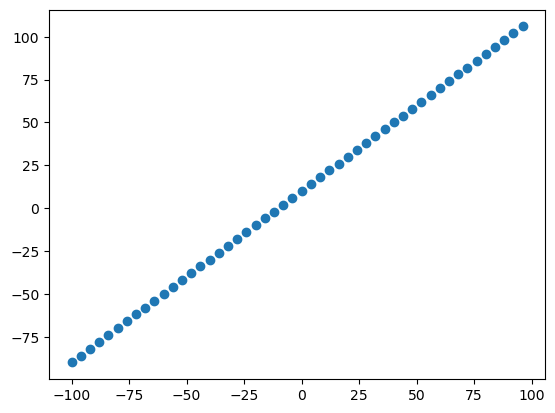

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

###The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available

In [33]:
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40]
X_test = X[40:]
X_train , X_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>)

In [35]:
y_train = y[:40]
y_test = y[40:]
y_train , y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [36]:
len(X_train ) , len (X_test) , len(y_train ) , len (y_test)

(40, 10, 40, 10)

### visualing the data

Now we've got our data in training and test sets... let's visualize it again!

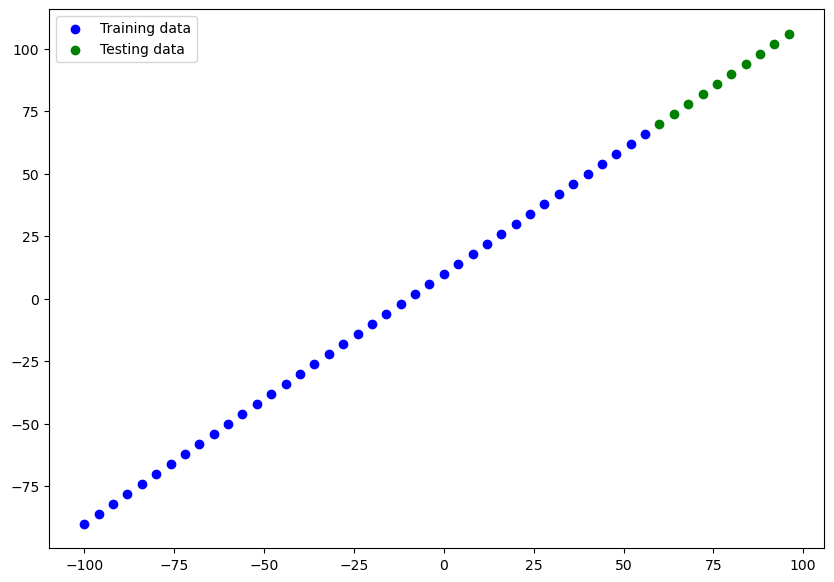

In [37]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train , c="b",label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g" , label = "Testing data")
# Show a legend
plt.legend();

In [38]:
# Let's have a look at how to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

model.fit(tf.expand_dims(X_train,axis=-1) ,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 28.4056 - mae: 28.4056
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.9637 - mae: 8.9637
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8341 - mae: 9.8341
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0378 - mae: 12.0378
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1001 - mae: 11.1001
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2496 - mae: 10.2496
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2542 - mae: 9.2542
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1681 - mae: 9.1681
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8099 - mae: 11.8099
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7440 - mae: 13.7440
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

### Visualizing the model

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
X[0] , y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [41]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10 , input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(1 ,name="output_layer")
],name="model")

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"]
              )

In [42]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10 , input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(20 ,name="input_layer2"),
  tf.keras.layers.Dense(40 ,name="input_layer3"),
  tf.keras.layers.Dense(80 ,name="input_layer4"),
   tf.keras.layers.Dense(40 ,name="input_layer5"),
  tf.keras.layers.Dense(1 ,name="output_layer")
], name="model_1")

# Compile the model with a lower learning rate
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

In [43]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 20)                220       
                                                                 
 input_layer3 (Dense)        (None, 40)                840       
                                                                 
 input_layer4 (Dense)        (None, 80)                3280      
                                                                 
 input_layer5 (Dense)        (None, 40)                3240      
                                                                 
 output_layer (Dense)        (None, 1)                 41        
                                                                 
Total params: 7,641
Trainable params: 7,641
Non-trainable p

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns)
* Non-trainable params = these parameters aren't updated during training (this is typical when you bring in already learn patterns o parameters from other model during **transfer learning**)

In [44]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [45]:
X_train+10 ==  y_train

<tf.Tensor: shape=(40,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])>

In [46]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100 , verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 44.0674 - mae: 44.0674
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 22.4812 - mae: 22.4812
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4249 - mae: 8.4249
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 13.9971 - mae: 13.9971
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.8699 - mae: 14.8699
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.5856 - mae: 12.5856
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4419 - mae: 9.4419
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2638 - mae: 9.2638
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 10.6769 - mae: 10.6769
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.3780 - mae: 8.3780
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

In [47]:
# Get summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 20)                220       
                                                                 
 input_layer3 (Dense)        (None, 40)                840       
                                                                 
 input_layer4 (Dense)        (None, 80)                3280      
                                                                 
 input_layer5 (Dense)        (None, 40)                3240      
                                                                 
 output_layer (Dense)        (None, 1)                 41        
                                                                 
Total params: 7,641
Trainable params: 7,641
Non-trainable p

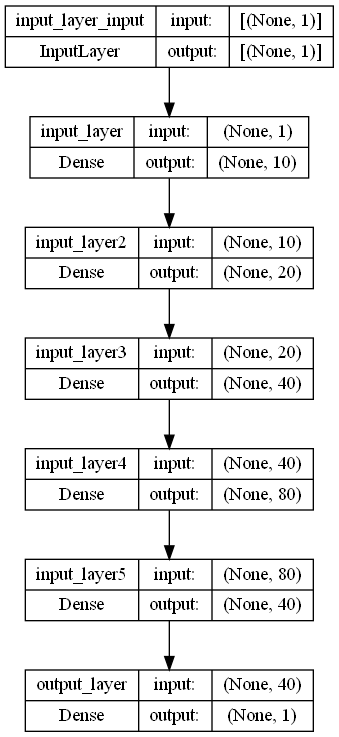

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

to visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the from of `y_test` or `y_true` versus `y_pred`(ground truth versus your model's predictions)


In [49]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 70ms/step


array([[ 68.58352 ],
       [ 72.45895 ],
       [ 76.375984],
       [ 80.28805 ],
       [ 84.1876  ],
       [ 88.11287 ],
       [ 92.04354 ],
       [ 95.91562 ],
       [ 99.8378  ],
       [103.76468 ]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** If you feel like you're going to reuse some kind of functionality , it's good to turn into a function .

In [51]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compare predictions to ground truth labels
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions,c="r" ,label="Predictions")
  # Show the legend
  plt.legend();

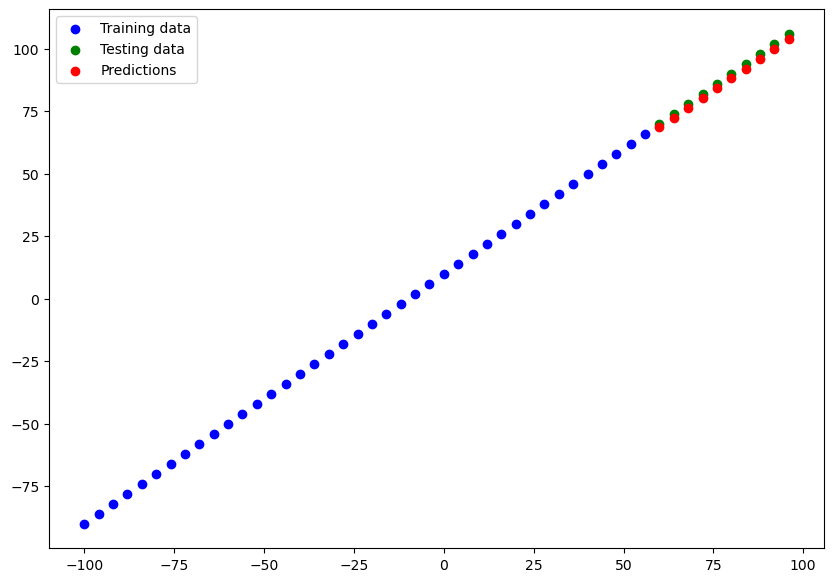

In [52]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluarte our model's predictions with regression evaluation metricts

Depending on the problem you're working on , there will be defferent evaluation metricts to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"
* Huber

In [53]:
  # Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 164ms/step - loss: 1.8431 - mae: 1.8431


[1.8431396484375, 1.8431396484375]

In [54]:
# calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test ,
                                     y_pred =  tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.416481, 16.032843, 13.37441 , 11.484781, 10.36248 , 10.      ,
       10.408709, 11.566248, 13.50268 , 16.211742], dtype=float32)>

In [55]:
y_pred - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -2,  -6, -10, -14, -18, -22, -26, -30, -34, -38],
       [  2,  -2,  -6, -10, -14, -18, -22, -26, -30, -34],
       [  6,   2,  -2,  -6, -10, -14, -18, -22, -26, -30],
       [ 10,   6,   2,  -2,  -6, -10, -14, -18, -22, -26],
       [ 14,  10,   6,   2,  -2,  -6, -10, -14, -18, -22],
       [ 18,  14,  10,   6,   2,  -2,  -6, -10, -14, -18],
       [ 22,  18,  14,  10,   6,   2,  -2,  -6, -10, -14],
       [ 25,  21,  17,  13,   9,   5,   1,  -3,  -7, -11],
       [ 29,  25,  21,  17,  13,   9,   5,   1,  -3,  -7],
       [ 33,  29,  25,  21,  17,  13,   9,   5,   1,  -3]])>

In [56]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.58352 ],
       [ 72.45895 ],
       [ 76.375984],
       [ 80.28805 ],
       [ 84.1876  ],
       [ 88.11287 ],
       [ 92.04354 ],
       [ 95.91562 ],
       [ 99.8378  ],
       [103.76468 ]], dtype=float32)>

In [57]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [58]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.58352 ,  72.45895 ,  76.375984,  80.28805 ,  84.1876  ,
        88.11287 ,  92.04354 ,  95.91562 ,  99.8378  , 103.76468 ],
      dtype=float32)>

In [59]:
# Calculate the MAE again!!!
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.8431396>

In [60]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.4639678>

In [61]:
# Make some func to reuse MAE and MSE
def mae (y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                                        y_pred=tf.squeeze(y_pred))

def mse (y_true , y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                                        y_pred=tf.squeeze(y_pred))


### Running experiment to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data- get more examples for your model to train on (more opportunities to learn pattern or relationships between features and lebels).
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model of a change to find pattern in the data

Let's do 3 modelling experiment :

1. `model_1` - same as original model, 1 layer , trained for 100 epochs.
2. `model_2` - 2 layer , trained for 100 epochs.
3. `model_3` - 3 layer , trained for 500 epochs.

**Build model_1**

In [62]:
X_train , y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [63]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train,y_train,epochs=320)

Epoch 1/320
2/2 [==============================] - 0s 4ms/step - loss: 50.6558 - mae: 50.6558
Epoch 2/320
2/2 [==============================] - 0s 5ms/step - loss: 17.7139 - mae: 17.7139
Epoch 3/320
2/2 [==============================] - 0s 6ms/step - loss: 9.9330 - mae: 9.9330
Epoch 4/320
2/2 [==============================] - 0s 7ms/step - loss: 9.6466 - mae: 9.6466
Epoch 5/320
2/2 [==============================] - 0s 5ms/step - loss: 10.5662 - mae: 10.5662
Epoch 6/320
2/2 [==============================] - 0s 5ms/step - loss: 9.7825 - mae: 9.7825
Epoch 7/320
2/2 [==============================] - 0s 4ms/step - loss: 8.8662 - mae: 8.8662
Epoch 8/320
2/2 [==============================] - 0s 4ms/step - loss: 9.0790 - mae: 9.0790
Epoch 9/320
2/2 [==============================] - 0s 9ms/step - loss: 19.4728 - mae: 19.4728
Epoch 10/320
2/2 [==============================] - 0s 5ms/step - loss: 10.5228 - mae: 10.5228
Epoch 11/320
2/2 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 43ms/step


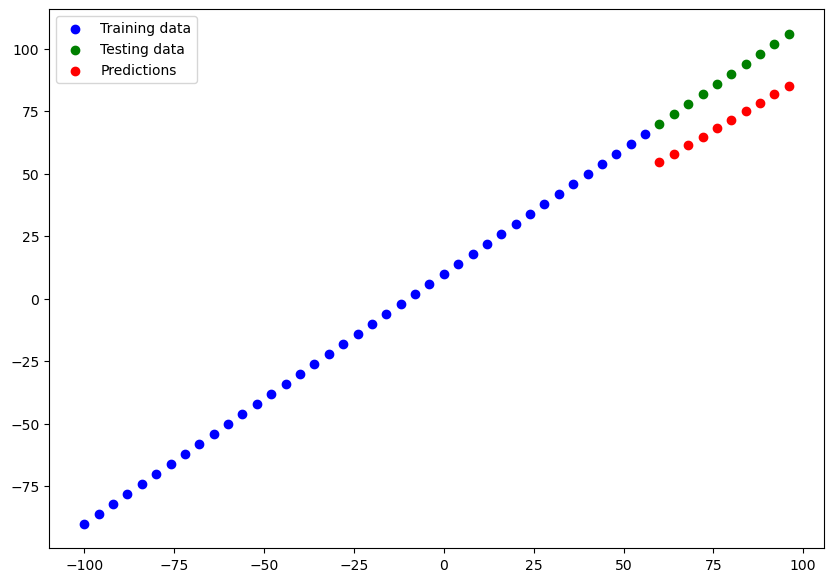

In [64]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [65]:
tf.constant(y_preds_1) , tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[54.688675],
        [58.071545],
        [61.454414],
        [64.83729 ],
        [68.22015 ],
        [71.60303 ],
        [74.98589 ],
        [78.36877 ],
        [81.75163 ],
        [85.13451 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([54.688675, 58.071545, 61.454414, 64.83729 , 68.22015 , 71.60303 ,
        74.98589 , 78.36877 , 81.75163 , 85.13451 ], dtype=float32)>)

In [66]:
# Calculate model_1 evalauateion metricts
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
# mae_1 = tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
# mse_1 = tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_preds_1))
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.08841>,
 <tf.Tensor: shape=(), dtype=float32, numpy=330.33258>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [67]:
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 95.8260 - mse: 13657.0498
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5648 - mse: 168.7863
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 30.0715 - mse: 1338.7457
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 14.1483 - mse: 262.4254
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.7696 - mse: 323.8864
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.5015 - mse: 201.3583
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7761 - mse: 171.3129
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1513 - mse: 204.9733
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 38.2614 - mse: 2265.0774
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 25.7981 - mse: 935.1545
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 49ms/step


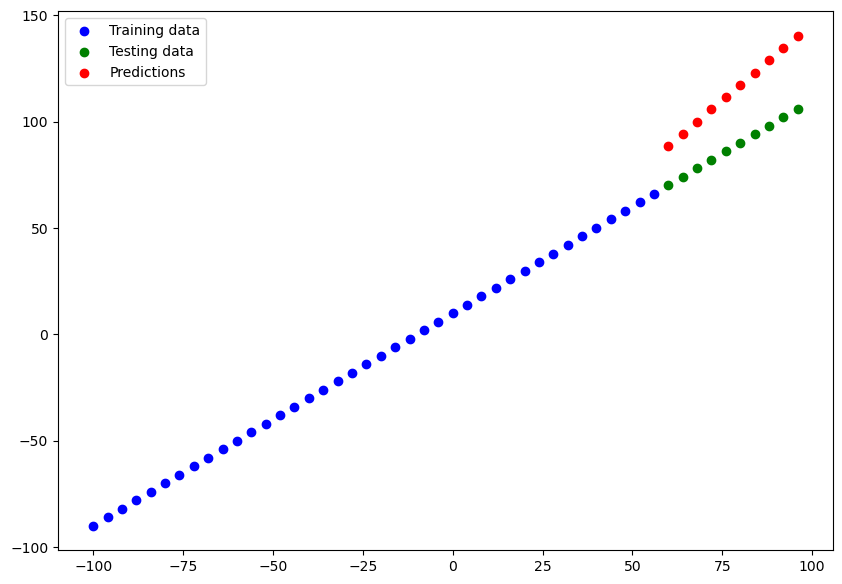

In [68]:
# Make and plot predictions of mode;_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [69]:
# Calculate model_2 evaluation metricts
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.385975>,
 <tf.Tensor: shape=(), dtype=float32, numpy=722.085>)

**Build `model 3` **

* 2 layers, trained for 500 epochs

In [87]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 41.8300 - mse: 2460.6267
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 31.6378 - mse: 1308.2224
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 34.7855 - mse: 1874.2545
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 18.2992 - mse: 466.5499
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 24.3236 - mse: 877.8096
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.7421 - mse: 129.3642
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.8080 - mse: 172.3545
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 12.2229 - mse: 206.9335
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.5984 - mse: 2308.5530
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 26.1048 - mse: 958.3578
Epoch 11/500
2/2 [===========================

1/1 [==============================] - 0s 46ms/step


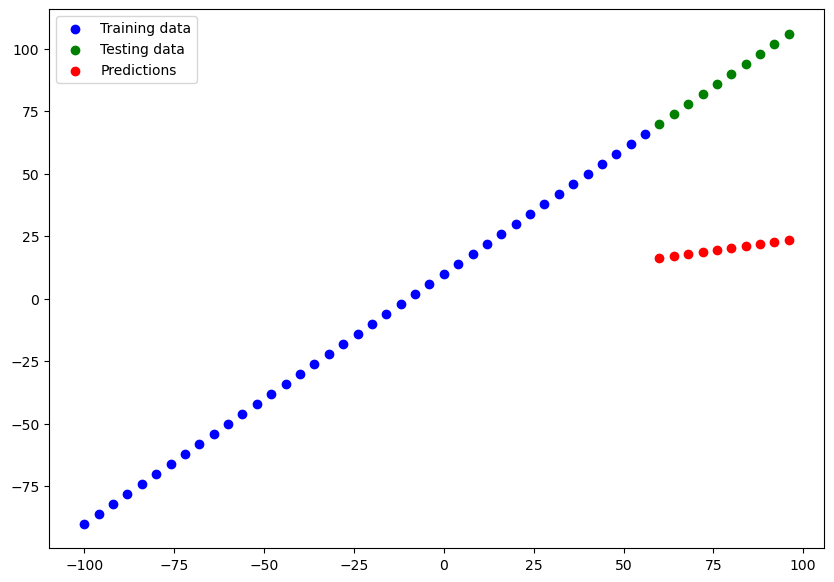

In [88]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [72]:
# Calculate model_3 evaluation metricts
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.93803>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4699.983>)

## Comparing the  results of our experiments
we,ve a few experiments, let's compare the results.

In [73]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_resultes = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_resultes

,model,mae,mse
0,model_1,18.088409,330.332581
1,model_2,26.385975,722.085022
2,model_3,67.938026,4699.982910


Look like 1 `model_2` performed the best...

In [74]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiment. The more experiments you do , the more thing you'll figure out which don't work . Remember the machine learning practioner's motto: "experiment, experiment , experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results fo your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

> **Resource:** As you build more model, you'll want to look into using:

* TensorBoard - a compoment of the TensorFlow library to help track modelling experiments (we'll see this one later)
* weights & Biases - a tool for tracking all of all kinds of machine learning experiments (plugs straight in to tensorBoard)

## Saving our models

saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main format we can save our model's too:

1. The ScavedModel format
2. The HDF5 format

In [75]:
# Save model
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [76]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model



In [77]:
# Load in the SavedModel format model
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SaveModel_format.summary()

OSError: No file or directory found at /content/best_model_SavedModel_format

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 112ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 75ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to deownload your files from Google Colab

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below)

In [ ]:
# Download a file from google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (require mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlowCourse

In [ ]:
!ls /content/drive/MyDrive/TensorFlowCourse

best_model_HDF5_format.h5


## A larger example

In [ ]:
# What we've learned
X_train , y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"],insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our DataFrame so it's all number
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X) ,len(X_train) , len(X_test)

(1338, 1070, 268)

In [ ]:
len(y) ,len(y_train) , len(y_test)

(1338, 1070, 268)

In [ ]:
len(X) == len(X_train) + len(X_test)

True

In [ ]:
len(y) == len(y_train) + len(y_test)

True

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3, Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8623.8613 - mae: 8623.8613
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7870.1719 - mae: 7870.1719
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7577.7661 - mae: 7577.7661
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7734.3389 - mae: 7734.3389
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7739.0288 - mae: 7739.0288
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7610.5913 - mae: 7610.5913
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7573.7285 - mae: 7573.7285
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7807.9849 - mae: 7807.9849
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7620.7329 - mae: 7620.7329
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7768.0513 - mae: 7768.0513

In [ ]:
# Check the result of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7508.6133 - mae: 7508.6133


[7508.61328125, 7508.61328125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units (+Use Adam)
2. Trainfor longer
3. (Insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13249.1367 - mae: 13249.1367
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13020.6836 - mae: 13020.6836
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12550.5801 - mae: 12550.5801
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11682.1729 - mae: 11682.1729
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10371.8486 - mae: 10371.8486
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8905.9375 - mae: 8905.9375
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7796.9429 - mae: 7796.9429
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7460.0171 - mae: 7460.0171
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7414.4790 - mae: 7414.4790
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7394.5776 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4563.9409 - mae: 4563.9409


[4563.94091796875, 4563.94091796875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (Same as above but more epoch)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13265.1641 - mae: 13265.1641
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13081.8418 - mae: 13081.8418
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 12707.4160 - mae: 12707.4160
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 11986.4092 - mae: 11986.4092
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 10802.1133 - mae: 10802.1133
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 9336.3096 - mae: 9336.3096
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8050.3530 - mae: 8050.3530
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7499.1685 - mae: 7499.1685
Epoch 9/200
34/34 [==============================] - 0s 9ms/step - loss: 7416.5503 - mae: 7416.5503
Epoch 10/200
34/34 [==============================] - 0s 8ms/step - loss: 7396.8813 - mae:

In [ ]:
# Evaluate our model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3489.3687 - mae: 3489.3687


[3489.36865234375, 3489.36865234375]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7508.6133 - mae: 7508.6133


[7508.61328125, 7508.61328125]

Text(0.5, 0, 'epochs')

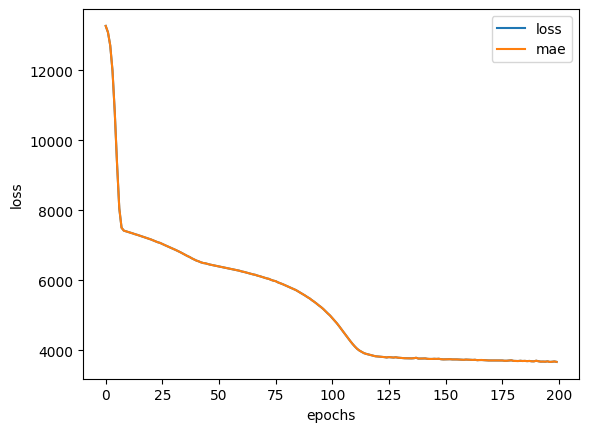

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (Same as above but more epoch)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history2 = insurance_model_4.fit(X_train,y_train,epochs=400)

Epoch 1/400
34/34 [==============================] - 1s 2ms/step - loss: 13265.2148 - mae: 13265.2148
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 13081.0146 - mae: 13081.0146
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 12712.0830 - mae: 12712.0830
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 12012.8721 - mae: 12012.8721
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 10869.3887 - mae: 10869.3887
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 9435.6895 - mae: 9435.6895
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 8141.3037 - mae: 8141.3037
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 7526.5459 - mae: 7526.5459
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 7425.2197 - mae: 7425.2197
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 7405.5127 - mae:

In [ ]:
insurance_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.1772 - mae: 3160.1772


[3160.17724609375, 3160.17724609375]

Text(0.5, 0, 'epochs')

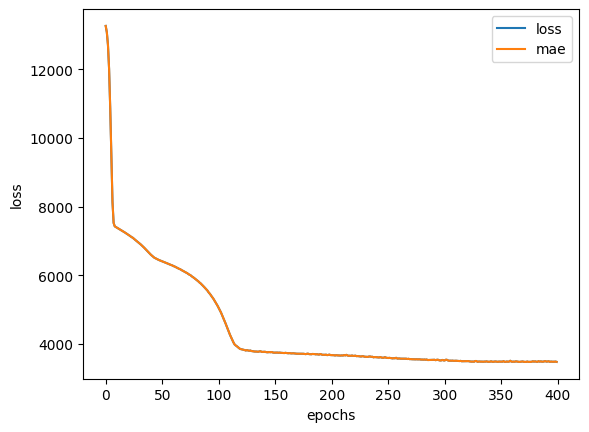

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question:** How long should you train for?

It depends. Really.. it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback

## Preprocessing data (nomalization and standardization)

In term of scaling values, neural networks tend to prefer nomalization.

If you're not sure on which to use, you could try both and see which performs better

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

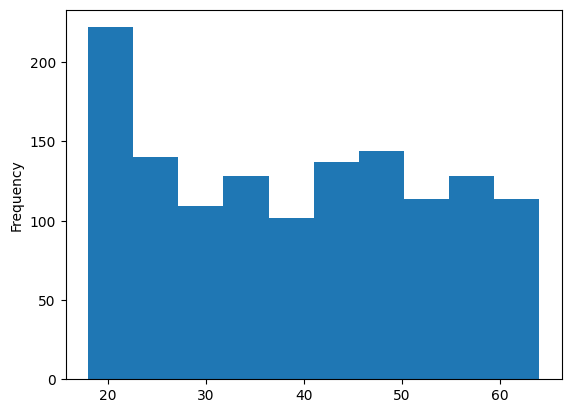

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

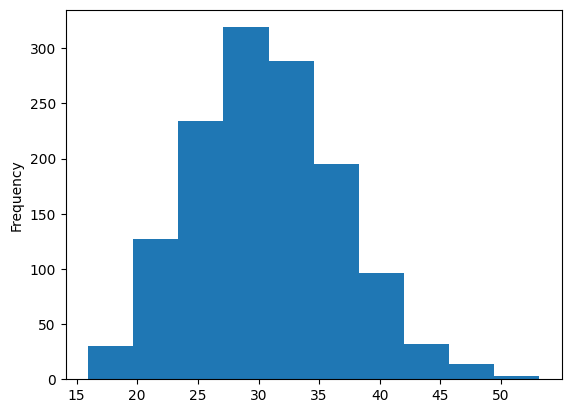

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurancedataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data , we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Turn allvalue in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now ?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalization and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
# 1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_5.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13343.2832 - mae: 13343.2832
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13335.2080 - mae: 13335.2080
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13315.4727 - mae: 13315.4727
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13274.2285 - mae: 13274.2285
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13200.7734 - mae: 13200.7734
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13083.7812 - mae: 13083.7812
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12912.7275 - mae: 12912.7275
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12677.4131 - mae: 12677.4131
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12367.5020 - mae: 12367.5020
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11977.24

In [ ]:
# Evaluate our model trained on normalized data
insurance_model_5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.2771 - mae: 3439.2771


[3439.277099609375, 3439.277099609375]